In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2 as Sampler

# from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram


# Phase kickback example

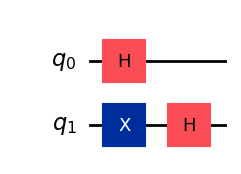

In [2]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)

qc.draw('mpl')


In [3]:
from qiskit.quantum_info import Statevector

In [4]:
Statevector(qc)

Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))


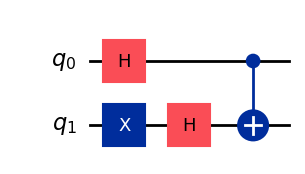

In [5]:
qc=QuantumCircuit(2)
qc.x(1)
# qc.h(0)   
qc.h(0)
qc.h(1)
# qc.cz(0,1)
qc.cx(0,1)
# qc.h(0)
# qc.h(1)
# qc.cp(3.14/2,0,1)

qc.draw('mpl')

In [6]:
Statevector(qc)

Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))


# To create custom gates

In [7]:


from qiskit.circuit.library import UnitaryGate


# simulator backend
# backend = StatevectorSimulator()
# backend = QasmSimulator()
backend = AerSimulator()

 
# matrix = [[0, 0, 0, 1],
#           [0, 0, 1, 0],
#           [1, 0, 0, 0],
#           [0, 1, 0, 0]]

# matrix = [[0, 1, 0, 0],
#           [1, 0, 0, 0],
#           [0, 0, 1, 0],
#           [0, 0, 0, 1]]

matrix = [[0, 0, 1, 0],
          [0, 1, 0, 0],
          [1, 0, 0, 0],
          [0, 0, 0, 1]]
gate = UnitaryGate(matrix)
 
circuit = QuantumCircuit(2)
# circuit.x(0)
circuit.x(1)
circuit.append(gate, [0, 1]) 
circuit.measure_all()
# Quantum circuit to make a  state
# bell = QuantumCircuit(1,1)
# bell.h(0)
# # bell.cx(0, 1)
# bell.measure_all()
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

# execute the quantum circuit
sampler = Sampler(backend)
job = sampler.run([isa_circuit],shots=1024)
result = job.result()
 
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


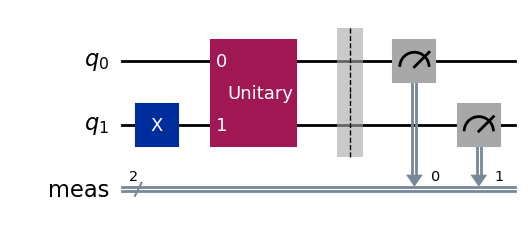

In [8]:
circuit.draw('mpl')

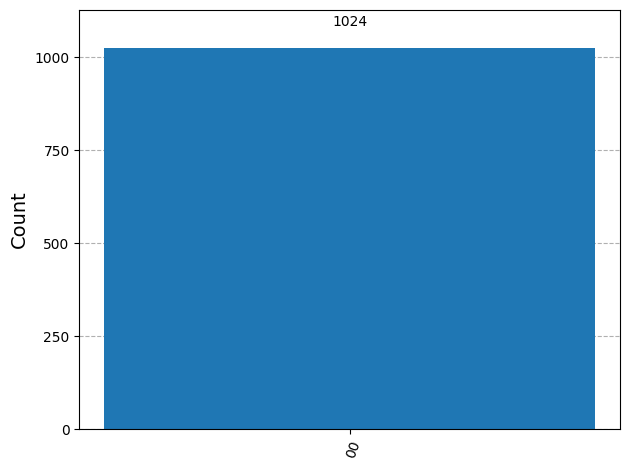

In [9]:
plot_histogram(result[0].data.meas.get_counts())

# What is above gate ? fill your answer in google form

# https://forms.gle/w7AjXpJwh3KLLR5r9

# create C0C0_NOT gate and verify it actions on all possible input states.

hint : https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.CXGate 

https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.CCXGate

# create a quantum state from the circuit  cos(theta1)|0> + sin(theta1)|1>(|00> )+  cos(theta2)|0> + sin(theta2)|1>(|11>) use theta1=pi/4, theta2=pi/2

In [10]:
# # Measure in Pauli bases
# from qiskit.circuit import QuantumCircuit
 
# # create a circuit, where we would like to measure
# # q0 in the X basis, q1 in the Y basis and q2 in the Z basis
# circuit = QuantumCircuit(3)
# circuit.h(0)
# circuit.t(0)
# # circuit.h(1)
# # circuit.h(2)
# # circuit.ry(0.8, 0)
# # circuit.cx(0, 1)
# # circuit.cx(1, 2)
# circuit.barrier()
 
# # diagonalize X with the Hadamard gate
# # circuit.h(0)
# # circuit.h(1)
# # circuit.h(2)
 
# # diagonalize Y with Hadamard as S^\dagger
# circuit.sdg(0)
# circuit.h(0)

# # circuit.sdg(1)
# # circuit.h(1)

# # circuit.sdg(2)
# # circuit.h(2)
 
# # the Z basis is the default, no action required here
 
# # measure all qubits
# circuit.measure_all()
# circuit.draw("mpl")